# Задача 1

In [2]:
import pandas as pd

In [17]:
log = pd.read_csv('Yandex Cap 2020 - Квалификация/log.csv')
log

,date,user,event_type,parameter
0,2020-04-01_00:01:44,657917,4,NaN
1,2020-04-01_00:00:36,660683,1,NaN
2,2020-04-01_00:02:01,799063,2,NaN
3,2020-04-01_00:04:08,817587,2,unknown
4,2020-04-01_00:08:42,626040,0,NaN
...,...,...,...,...
199995,2020-04-30_23:56:36,789783,4,unknown
199996,2020-04-30_23:57:00,226092,2,video
199997,2020-04-30_23:57:33,853935,1,music
199998,2020-04-30_23:59:06,992456,2,text


In [18]:
log.date = log.date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d_%H:%M:%S'))
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        200000 non-null  datetime64[ns]
 1   user        200000 non-null  int64         
 2   event_type  200000 non-null  int64         
 3   parameter   166722 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.1+ MB


In [20]:
log = log.sort_values(by = ['user','date'])
log

,date,user,event_type,parameter
1817,2020-04-01 09:29:12,100187,1,unknown
4857,2020-04-01 17:18:31,100187,3,video
8984,2020-04-02 10:15:31,100187,2,picture
9138,2020-04-02 10:45:31,100187,2,video
13714,2020-04-03 06:45:33,100187,4,picture
...,...,...,...,...
147145,2020-04-22 19:38:40,999959,2,unknown
157758,2020-04-23 22:48:04,999959,3,picture
157958,2020-04-23 23:18:04,999959,3,NaN
165984,2020-04-25 13:00:31,999959,0,video


In [21]:
l = log.copy()
l['diff'] = l.groupby('user')['date'].diff(1)
l

,date,user,event_type,parameter,diff
1817,2020-04-01 09:29:12,100187,1,unknown,NaT
4857,2020-04-01 17:18:31,100187,3,video,0 days 07:49:19
8984,2020-04-02 10:15:31,100187,2,picture,0 days 16:57:00
9138,2020-04-02 10:45:31,100187,2,video,0 days 00:30:00
13714,2020-04-03 06:45:33,100187,4,picture,0 days 20:00:02
...,...,...,...,...,...
147145,2020-04-22 19:38:40,999959,2,unknown,0 days 14:23:08
157758,2020-04-23 22:48:04,999959,3,picture,1 days 03:09:24
157958,2020-04-23 23:18:04,999959,3,NaN,0 days 00:30:00
165984,2020-04-25 13:00:31,999959,0,video,1 days 13:42:27


In [27]:
sessions_start = l[(l['diff'].isnull()) | (l['diff'] > '1800 seconds')].copy()
sessions_start['session_id'] = sessions_start.index
sessions_start

,date,user,event_type,parameter,diff,session_id
1817,2020-04-01 09:29:12,100187,1,unknown,NaT,1817
4857,2020-04-01 17:18:31,100187,3,video,0 days 07:49:19,4857
8984,2020-04-02 10:15:31,100187,2,picture,0 days 16:57:00,8984
13714,2020-04-03 06:45:33,100187,4,picture,0 days 20:00:02,13714
18833,2020-04-03 21:21:27,100187,1,picture,0 days 14:35:54,18833
...,...,...,...,...,...,...
140689,2020-04-22 05:15:32,999959,1,NaN,0 days 19:25:00,140689
147145,2020-04-22 19:38:40,999959,2,unknown,0 days 14:23:08,147145
157758,2020-04-23 22:48:04,999959,3,picture,1 days 03:09:24,157758
165984,2020-04-25 13:00:31,999959,0,video,1 days 13:42:27,165984


In [33]:
sessions_start[(sessions_start.date.dt.year == 2020) &
               (sessions_start.date.dt.month == 4) &
               (sessions_start.date.dt.day == 11)]

,date,user,event_type,parameter,diff,session_id
70908,2020-04-11 02:07:47,101049,0,NaN,0 days 15:35:39,70908
70890,2020-04-11 01:58:15,101452,3,picture,0 days 02:30:22,70890
74324,2020-04-11 18:33:02,101452,2,music,0 days 16:34:47,74324
71877,2020-04-11 08:17:49,102153,3,unknown,0 days 12:56:48,71877
73535,2020-04-11 15:13:40,102153,0,picture,0 days 06:55:51,73535
...,...,...,...,...,...,...
74750,2020-04-11 20:26:03,999566,4,NaN,0 days 23:27:11,74750
74989,2020-04-11 21:30:28,999566,0,music,0 days 01:04:25,74989
71779,2020-04-11 07:46:56,999576,4,text,0 days 16:32:09,71779
72909,2020-04-11 12:42:55,999744,2,music,0 days 15:44:18,72909


In [35]:
log['year'] = log.date.dt.year
log['month'] = log.date.dt.month
log['day'] = log.date.dt.day
log

,date,user,event_type,parameter,year,month,day
1817,2020-04-01 09:29:12,100187,1,unknown,2020,4,1
4857,2020-04-01 17:18:31,100187,3,video,2020,4,1
8984,2020-04-02 10:15:31,100187,2,picture,2020,4,2
9138,2020-04-02 10:45:31,100187,2,video,2020,4,2
13714,2020-04-03 06:45:33,100187,4,picture,2020,4,3
...,...,...,...,...,...,...,...
147145,2020-04-22 19:38:40,999959,2,unknown,2020,4,22
157758,2020-04-23 22:48:04,999959,3,picture,2020,4,23
157958,2020-04-23 23:18:04,999959,3,NaN,2020,4,23
165984,2020-04-25 13:00:31,999959,0,video,2020,4,25


In [38]:
pic_load = log[(log.event_type == 3) & (log.parameter == 'picture')].copy()
pic_load

,date,user,event_type,parameter,year,month,day
23592,2020-04-04 16:37:28,100412,3,picture,2020,4,4
189475,2020-04-29 08:26:05,100660,3,picture,2020,4,29
159157,2020-04-24 09:43:28,101049,3,picture,2020,4,24
57541,2020-04-09 09:52:00,101201,3,picture,2020,4,9
116435,2020-04-18 07:23:20,101201,3,picture,2020,4,18
...,...,...,...,...,...,...,...
40263,2020-04-06 22:24:15,999566,3,picture,2020,4,6
130647,2020-04-20 19:48:07,999576,3,picture,2020,4,20
199960,2020-04-30 23:37:00,999744,3,picture,2020,4,30
54523,2020-04-08 19:49:20,999959,3,picture,2020,4,8


In [58]:
pic_load[['year', 'month', 'day', 'user']].drop_duplicates() \
    .groupby(by=['year', 'month', 'day']).count().sort_values(by='user', ascending=False)

user
year month day      
2020 4     25    330
           29    295
           7     293
           23    292
           10    281
           12    272
           22    265
           13    262
           20    255
           6     250
           5     248
           16    247
           21    247
           3     233
           8     231
           1     230
           15    222
           17    218
           2     215
           9     208
           19    203
           27    199
           4     191
           26    175
           28    163
           11    147
           24    122
           30    113
           14    106
           18     82

In [198]:
log

,date,user,event_type,parameter,year,month,day
1817,2020-04-01 09:29:12,100187,1,unknown,2020,4,1
4857,2020-04-01 17:18:31,100187,3,video,2020,4,1
8984,2020-04-02 10:15:31,100187,2,picture,2020,4,2
9138,2020-04-02 10:45:31,100187,2,video,2020,4,2
13714,2020-04-03 06:45:33,100187,4,picture,2020,4,3
...,...,...,...,...,...,...,...
147145,2020-04-22 19:38:40,999959,2,unknown,2020,4,22
157758,2020-04-23 22:48:04,999959,3,picture,2020,4,23
157958,2020-04-23 23:18:04,999959,3,NaN,2020,4,23
165984,2020-04-25 13:00:31,999959,0,video,2020,4,25


In [199]:
l3 = log.sort_values(by = 'date').copy()
l3 

,date,user,event_type,parameter,year,month,day
1,2020-04-01 00:00:36,660683,1,NaN,2020,4,1
0,2020-04-01 00:01:44,657917,4,NaN,2020,4,1
2,2020-04-01 00:02:01,799063,2,NaN,2020,4,1
3,2020-04-01 00:04:08,817587,2,unknown,2020,4,1
4,2020-04-01 00:08:42,626040,0,NaN,2020,4,1
...,...,...,...,...,...,...,...
199995,2020-04-30 23:56:36,789783,4,unknown,2020,4,30
199996,2020-04-30 23:57:00,226092,2,video,2020,4,30
199997,2020-04-30 23:57:33,853935,1,music,2020,4,30
199998,2020-04-30 23:59:06,992456,2,text,2020,4,30


In [201]:
l3.index = l3.date
l3

,date,user,event_type,parameter,year,month,day
date,,,,,,,
2020-04-01 00:00:36,2020-04-01 00:00:36,660683,1,NaN,2020,4,1
2020-04-01 00:01:44,2020-04-01 00:01:44,657917,4,NaN,2020,4,1
2020-04-01 00:02:01,2020-04-01 00:02:01,799063,2,NaN,2020,4,1
2020-04-01 00:04:08,2020-04-01 00:04:08,817587,2,unknown,2020,4,1
2020-04-01 00:08:42,2020-04-01 00:08:42,626040,0,NaN,2020,4,1
...,...,...,...,...,...,...,...
2020-04-30 23:56:36,2020-04-30 23:56:36,789783,4,unknown,2020,4,30
2020-04-30 23:57:00,2020-04-30 23:57:00,226092,2,video,2020,4,30
2020-04-30 23:57:33,2020-04-30 23:57:33,853935,1,music,2020,4,30


In [208]:
l4 = l3[['event_type']].resample('10Min').count().copy()
l4

,event_type
date,
2020-04-01 00:00:00,7
2020-04-01 00:10:00,4
2020-04-01 00:20:00,9
2020-04-01 00:30:00,14
2020-04-01 00:40:00,15
...,...
2020-04-30 23:10:00,28
2020-04-30 23:20:00,27
2020-04-30 23:30:00,24


In [209]:
l4[l4.event_type == max(l4.event_type)]

,event_type
date,
2020-04-22 15:20:00,113


In [216]:
l3[['event_type']].resample('10Min', origin='2020-04-01 00:00:06').count().event_type.max()

113

In [217]:
from datetime import datetime, timedelta

In [226]:
k = pd.to_datetime('2020-04-01 00:00:00')
max_sob = 0
for i in range(0,600):
    time = k + timedelta(seconds=i)
    maximum = l3[['event_type']].resample('10Min', origin=time) \
        .count().event_type.max()
    if maximum > max_sob:
        max_sob, t = maximum, i
print(max_sob, t)

118 352


In [229]:
k = pd.to_datetime('2020-04-01 00:00:00')
time = k + timedelta(seconds=353)
l5 = l3[['event_type']].resample('10Min', origin=time).count()

In [230]:
l5[l5.event_type == max(l5.event_type)]

,event_type
date,
2020-04-25 12:45:53,118


# Задача 2

In [109]:
%%time
results = pd.DataFrame(columns = [1, 2, 3, 4])
cards = [7, 8, 9, 10, 11, 12, 13, 14] * 4
cards = {i: cards[i-1] for i in range(1,33)}
counter = 0
for i in range(1,33):
    c1 = cards.copy()
    first = c1[i]
    del c1[i]
    for k2 in c1.keys():
        c2 = c1.copy()
        second = c2[k2]
        del c2[k2]
        for k3 in c2.keys():
            c3 = c2.copy()
            third = c3[k3]
            del c3[k3]
            for k4 in c3.keys():
                c4 = c3.copy()
                forth = c4[k4]
                del c4[k4]
                results.loc[counter] = [first, second, third, forth]
                counter += 1

results

KeyboardInterrupt: 

In [105]:
import math

In [108]:
math.factorial(32)/(math.factorial(6)*math.factorial(32-6))

906192.0

In [ ]:
combinations

In [154]:
cards = [7, 8, 9, 10, 11, 12, 13, 14] * 4
# cards = {i: cards[i-1] for i in range(1,33)}
display(cards)

[7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14]

In [156]:
from itertools import *

In [159]:
com = combinations(cards, 6)

In [168]:
comb = pd.DataFrame(com)
comb

,0,1,2,3,4,5
0,8,11,13,7,8,13
1,8,11,13,7,8,14
2,8,11,13,7,9,10
3,8,11,13,7,9,11
4,8,11,13,7,9,12
...,...,...,...,...,...,...
687202,8,9,10,11,13,14
687203,8,9,10,12,13,14
687204,8,9,11,12,13,14
687205,8,10,11,12,13,14


In [173]:
comb['res'] = comb[0] + comb[1] + comb[2] + comb[3] + comb[4] + comb[5]
comb

,0,1,2,3,4,5,res
0,8,11,13,7,8,13,60
1,8,11,13,7,8,14,61
2,8,11,13,7,9,10,58
3,8,11,13,7,9,11,59
4,8,11,13,7,9,12,60
...,...,...,...,...,...,...,...
687202,8,9,10,11,13,14,65
687203,8,9,10,12,13,14,66
687204,8,9,11,12,13,14,67
687205,8,10,11,12,13,14,68


In [176]:
round(len(comb[comb.res == 50]) / len(comb), 6)

0.001467

# Задача 3

In [115]:
logs = pd.read_csv('Yandex Cap 2020 - Квалификация/logs.csv', header=None)
logs.columns = ['email', 'phone']
logs

,email,phone
0,user_11799@contest.yandex.ru,8.801111e+12
1,user_5682@contest.yandex.ru,8.801111e+12
2,user_14735@contest.yandex.ru,8.801111e+11
3,user_11725@contest.yandex.ru,8.801111e+11
4,user_7948@contest.yandex.ru,8.801111e+11
...,...,...
12081,user_9750@contest.yandex.ru,8.801111e+11
12082,user_7735@contest.yandex.ru,8.801111e+11
12083,user_520@contest.yandex.ru,8.801111e+11
12084,user_5325@contest.yandex.ru,8.801111e+12


In [133]:
logs['user'] = None
counter = 0
for index, row in logs.iterrows():
    check = logs.loc[:index-1,:].copy()
    num = len(check[(check.email == row[0])|(check.phone == row[1])].user.unique())
    if num == 0:
        logs.loc[index, 'user'] = counter
        counter += 1
    else:
        logs.loc[index, 'user'] = check[(check.email == row[0])|(check.phone == row[1])].user.unique()[0]
#        print(check[(check.email == row[0])|(check.phone == row[1])].user.unique()[0])
logs

,email,phone,user
0,user_11799@contest.yandex.ru,8.801111e+12,0
1,user_5682@contest.yandex.ru,8.801111e+12,1
2,user_14735@contest.yandex.ru,8.801111e+11,2
3,user_11725@contest.yandex.ru,8.801111e+11,3
4,user_7948@contest.yandex.ru,8.801111e+11,4
...,...,...,...
12081,user_9750@contest.yandex.ru,8.801111e+11,1979
12082,user_7735@contest.yandex.ru,8.801111e+11,2217
12083,user_520@contest.yandex.ru,8.801111e+11,870
12084,user_5325@contest.yandex.ru,8.801111e+12,208


In [149]:
logs_res = logs.copy()
user_max = logs_res[['user', 'phone']] \
    .groupby(by='user', as_index=False).count() \
    .sort_values(by='phone', ascending=False).iloc[0,0]

In [151]:
logs[logs.user == user_max].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 106 to 12001
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   email   21 non-null     object 
 1   phone   21 non-null     float64
 2   user    21 non-null     object 
dtypes: float64(1), object(2)
memory usage: 672.0+ bytes


# Задача 4

In [179]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

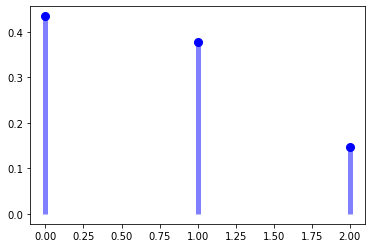

In [180]:
fig, ax = plt.subplots(1, 1)
n, p = 10, 0.08
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);

In [181]:
В день заражает 0,8 человек

array(0.8)

In [184]:
df = pd.DataFrame(columns=['day','inf','tr'])
df.loc[0] = [0,1,0]
df

,day,inf,tr
0,0,1,0


In [197]:
for i in range(1,30):
    if i >= 14:
        tr = round(df.loc[i-1,'tr'] + df.loc[i-14,'inf'], 3)
    else: tr = 0
    inf = min(round(df.loc[i-1,'inf'] + df.loc[i-1,'inf']*0.8, 3), 124)
    df.loc[i] = [i, inf, tr]
df

,day,inf,tr
0,0,1,0
1,1,1.8,0
2,2,3.24,0
3,3,5.832,0
4,4,10.498,0
5,5,18.896,0
6,6,34.013,0
7,7,61.223,0
8,8,110.201,0
9,9,124,0
